## Introduction
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



https://archive.ics.uci.edu/ml/datasets/bank+marketing#

We expect numerical data, so in this dataset, we translate the norminal data to numerical.

In [20]:
import numpy as np
import pandas as pd

data = pd.read_csv("bank.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
job_list = ['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown']
job_dict = {job_list[i]:i for i in range(len(job_list))}
marital_list = ['divorced','married','single','unknown']
marital_dict = {marital_list[i]:i for i in range(len(marital_list))}
edu_list = ['primary','secondary','tertiary','unknown']
edu_dict = {edu_list[i]:i for i in range(len(edu_list))}
contact_list = ['unknown','cellular','telephone']
contact_dict = {contact_list[i]: i for i in range(len(contact_list))}
month_list= ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month_dict = {month_list[i]:i+1 for i in range(len(month_list))}
pout_list = ['failure','unknown','success','other']
pout_dict = {pout_list[i]:i-1 for i in range(len(pout_list))}

data['job'] = data['job'].map(job_dict)
data['marital'] = data['marital'].map(marital_dict)
data['education'] = data['education'].map(edu_dict)
data['contact'] = data['contact'].map(contact_dict)
data['month'] = data['month'].map(month_dict)
data['poutcome'] = data['poutcome'].map(pout_dict)

for item in ['default','housing','loan','y']:
    data[item] = data[item].map({'yes':1, 'no':0})
    
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,1,19,10,79,1,-1,0,0,0
1,33,7,1,1,0,4789,1,1,1,11,5,220,1,339,4,-1,0
2,35,4,2,2,0,1350,1,0,1,16,4,185,1,330,1,-1,0
3,30,4,1,2,0,1476,1,1,0,3,6,199,4,-1,0,0,0
4,59,1,1,1,0,0,1,0,0,5,5,226,1,-1,0,0,0


## Using sklearn Library to do PCA

The variance of PCA factors: 
[0.1088456  0.10060327 0.09094646 0.07331073 0.07016355 0.06532421
 0.06234761 0.06073045 0.05840602 0.05587537 0.05325361 0.0512554
 0.04862395 0.04278892 0.03261104 0.02491379]


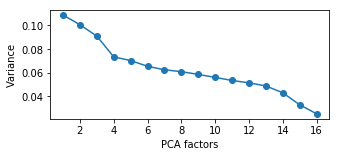

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# divide the data set into feature set and label
X = data.iloc[:,:16] #feature set
y = data.iloc[:,16:] # label
# divide the data set into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = np.ravel(y_train)

# PCA works best with normalized data feature set
scaler = StandardScaler()
X_train_original = scaler.fit_transform(X_train)
X_test_original = scaler.fit_transform(X_test)

# Do PCA (n-factors)
X_train = X_train_original
X_test = X_test_original
pca = PCA() # number of features isn't specified, thus all the 20 fatures will be used
X_train = pca.fit_transform(X_train) # get fitted PCA model
X_test = pca.transform(X_test) # do transformation using the model got above

# analyze the variance
explained_variance = pca.explained_variance_ratio_ 
print("The variance of PCA factors: ")
print(explained_variance)
# draw the variance plot
plt.rcParams["figure.figsize"] = [5,2]
plt.plot([i+1 for i in range(16)], explained_variance[:16], "-o")
plt.xlabel("PCA factors")
plt.ylabel("Variance")
plt.show()

### Prediction Performance with different number of features

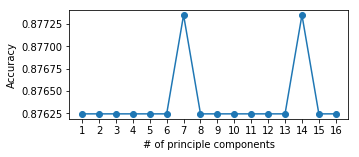

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

scores = []
for i in range(len(data.columns)-1):
    X_train = X_train_original
    X_test = X_test_original
    pca = PCA(n_components=i+1)
    X_train = pca.fit_transform(X_train) # get fitted PCA model
    X_test = pca.transform(X_test) # do transformation using the model got above

    # analyze the performance
    classifier = RandomForestClassifier(max_depth=2, random_state=0)  
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
    scores.extend([accuracy_score(y_test, y_pred)])
    
# draw the variance plot
plt.rcParams["figure.figsize"] = [5,2]
plt.plot(range(1,len(data.columns)), scores, "-o")
plt.xticks(range(1,len(data.columns)))
plt.xlabel("# of principle components")
plt.ylabel("Accuracy")
plt.show()

## Performance Analysis Using Scatter Chart

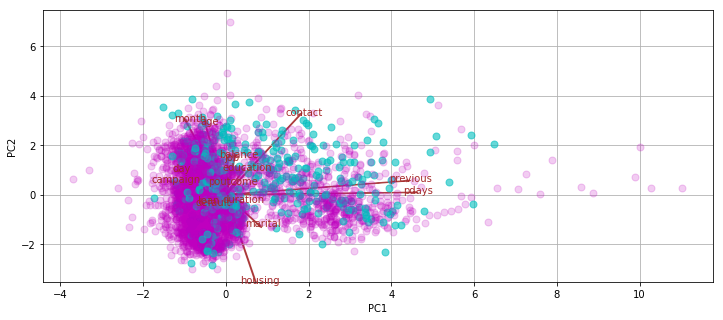

In [49]:
plt.rcParams["figure.figsize"] = [12,5]
# Do PCA and get the first 2 components
X = scaler.fit_transform(X)
pca = PCA()
X_trans = pca.fit_transform(X)

# The first two eigenvectors with greatest variance
x_vector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
y_vector = pca.components_[1]

# see 'prcomp(my_data)$x' in R
xs = X_trans[:,0] # 1st principle components of the data
ys = X_trans[:,1] # 2st principle components of the data

## visualize projections
# arrow: how much weight each original components plays in the composition of the PCs
for i in range(len(x_vector)):
    plt.arrow(0, 0, x_vector[i]*7, y_vector[i]*7,color = 'brown',alpha = 0.8, width = 0.025)
    plt.text(x_vector[i]*7+0.1, y_vector[i]*7+0.1,
             list(data.iloc[:,:16].columns.values)[i],  color = 'brown', ha = 'center', va = 'center')

for i in range(len(xs)):
    if (data.iloc[:,16:].values)[i] == 1:
        plt.plot(xs[i], ys[i], 'o', markersize=7, color= 'c' , alpha=0.6)
    else:
        plt.plot(xs[i], ys[i], 'o', markersize=7, color= 'm' , alpha=0.2)
    
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [51]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.071499,0.005534,0.115133,0.060488,-0.059233,0.031635,0.103665,-0.072174,0.255678,-0.165849,-0.138654,0.048585,-0.187070,0.648362,0.622526,0.010387
1,0.411073,0.200666,-0.176167,0.142490,-0.059319,0.221191,-0.505529,-0.044463,0.459081,0.138887,0.426382,-0.040376,0.074155,0.013564,0.079998,0.062239
2,-0.508172,0.338709,0.575744,0.444997,-0.033146,0.052007,-0.122230,-0.124790,0.072240,0.150602,0.084265,-0.035281,0.101637,-0.098088,-0.047481,0.069045
3,-0.129649,-0.220100,0.029717,-0.178458,0.118530,-0.262068,0.142190,0.313239,0.210398,0.508882,0.111604,-0.226504,0.541377,0.134803,0.149865,0.015611
4,0.051046,-0.198827,0.005944,-0.051991,-0.581009,0.449260,0.179519,-0.449447,-0.109299,0.209942,-0.073309,-0.168461,0.258796,0.031253,-0.003100,-0.154115
5,-0.025603,-0.182955,0.047222,-0.161523,-0.099710,-0.035777,-0.020024,-0.189249,-0.006784,0.160699,0.026778,0.550939,0.038443,-0.083789,0.074426,0.738888
6,-0.166064,-0.326776,0.242076,-0.145675,-0.216956,0.219118,0.002079,0.390822,0.165807,-0.036351,0.341254,0.456451,-0.174537,-0.032566,-0.083155,-0.382015
7,-0.102267,-0.315364,0.102331,-0.011156,0.292664,0.530935,0.061801,0.169519,-0.095278,-0.261003,0.238442,-0.436027,-0.050345,-0.038357,0.058586,0.384419
8,0.015896,0.173144,-0.310918,0.355440,0.388019,0.318990,0.399839,-0.026467,-0.222363,0.216346,0.195248,0.379899,0.146640,0.092664,0.086880,-0.132451
9,-0.011969,-0.254915,0.212333,-0.270497,0.561624,0.017154,-0.126999,-0.581762,0.180872,0.154200,-0.000186,0.040363,-0.122152,0.000912,-0.075544,-0.259960


In [34]:
from factor_analyzer import FactorAnalyzer # pip install factor_analyzer
fa = FactorAnalyzer()
df_X = pd.DataFrame(X, columns=['x{}'.format(i) for i in range(1,17)])
fa.analyze(df_X, 4, rotation='varimax',method='ml')
fa.loadings

,Factor1,Factor2,Factor3,Factor4
x1,0.971568,0.021242,0.224616,-0.012339
x2,-0.093450,-0.008947,0.306263,-0.051789
x3,-0.423088,0.018334,0.128026,-0.037745
x4,-0.192743,0.026184,0.287376,-0.044523
x5,-0.005105,-0.027537,-0.053162,0.031031
x6,0.047860,0.022372,0.162778,-0.016500
x7,-0.094117,0.043034,-0.470086,-0.182441
x8,0.019127,-0.016448,-0.123577,0.135556
x9,0.038062,0.313458,0.315950,0.293980
x10,-0.016267,-0.045577,0.009826,0.273571


In [36]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4
SS Loadings,1.184592,1.351532,0.675148,0.433464
Proportion Var,0.074037,0.084471,0.042197,0.027091
Cumulative Var,0.074037,0.158508,0.200705,0.227796
